# Repeat Locations: Identifying Persistent Violation Spots

This notebook identifies bus stops or routes with repeated violations. We will visualize top repeat locations, state a hypothesis, and summarize findings.

## 1. Import Required Libraries
We will use pandas, numpy, matplotlib, seaborn for analysis and visualization.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [3]:
# Load the MTA Bus Automated Camera Enforcement Violations dataset
violations_url = "https://data.ny.gov/api/views/kh8p-hcbm/rows.csv?accessType=DOWNLOAD"
try:
    violations_df = pd.read_csv(violations_url, nrows=10000)
    print('Columns in violations_df:')
    print(violations_df.columns.tolist())
    display(violations_df.head())
except Exception as e:
    print(f"Error loading violations data: {e}")

# Search for columns that may identify repeat locations
repeat_keys = [col for col in violations_df.columns if any(k in col.lower() for k in ['stop', 'intersection', 'route', 'location'])]
print('Possible repeat location columns:', repeat_keys)

Columns in violations_df:
['Violation ID', 'Vehicle ID', 'First Occurrence', 'Last Occurrence', 'Violation Status', 'Violation Type', 'Bus Route ID', 'Violation Latitude', 'Violation Longitude', 'Stop ID', 'Stop Name', 'Bus Stop Latitude', 'Bus Stop Longitude', 'Violation Georeference', 'Bus Stop Georeference']


,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,08/20/2025 11:12:08 PM,08/21/2025 12:24:08 AM,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,08/20/2025 11:48:59 PM,08/20/2025 11:54:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,08/20/2025 10:33:13 PM,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)


Possible repeat location columns: ['Bus Route ID', 'Stop ID', 'Stop Name', 'Bus Stop Latitude', 'Bus Stop Longitude', 'Bus Stop Georeference']


In [ ]:
# Diagnostic: Check non-null and unique counts for candidate repeat keys
if 'repeat_keys' in locals() and repeat_keys:
    diag = {k: {'non_null': violations_df[k].notnull().sum(), 'unique': violations_df[k].nunique()} for k in repeat_keys}
    diag_df = pd.DataFrame(diag).T
    display(diag_df)
    print('Columns with most non-null and unique values are best for repeat location analysis.')
else:
    print('No candidate repeat keys found for diagnostics.')

## 2. Aggregate and Visualize Top Repeat Violation Locations

We will group by the most relevant location column and visualize the top repeat spots.

Top 20 repeat locations by 'Bus Route ID':
Bus Route ID
M101     1687
M15+      771
BX19      631
M100      562
M2        522
BX41+     480
Q44+      448
BX36      421
B44+      347
M42       301
BX6+      258
Q54       253
B35       247
Q53+      237
B82+      233
B46+      231
BX12+     230
M4        229
BX28      219
B41       216
Name: count, dtype: int64


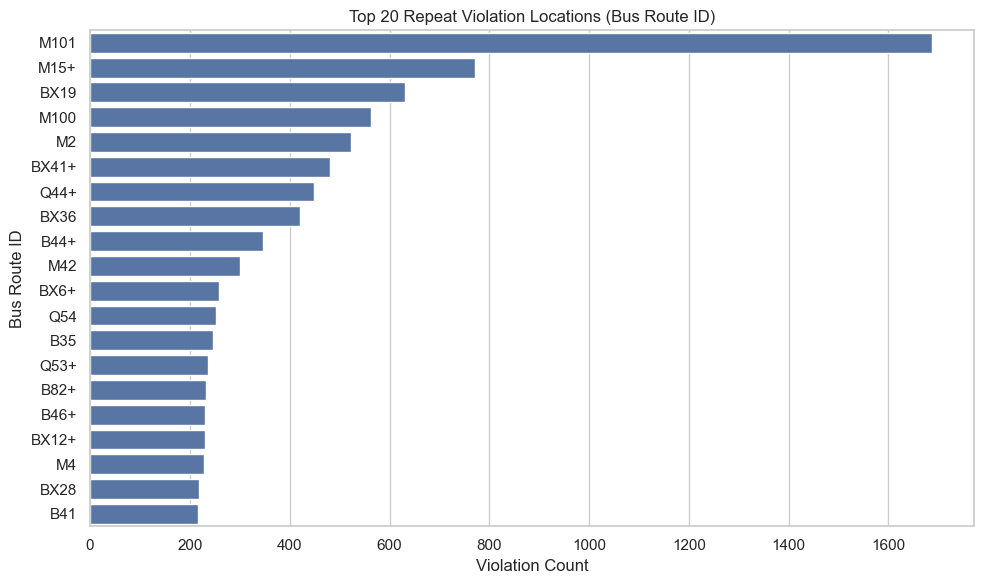

In [4]:
# Aggregate and plot top repeat violation locations
if repeat_keys:
    key = repeat_keys[0]  # Use the first relevant key found
    top_repeats = violations_df[key].value_counts().head(20)
    print(f"Top 20 repeat locations by '{key}':")
    print(top_repeats)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_repeats.values, y=top_repeats.index, orient='h')
    plt.title(f'Top 20 Repeat Violation Locations ({key})')
    plt.xlabel('Violation Count')
    plt.ylabel(key)
    plt.tight_layout()
    plt.show()
else:
    print('No suitable repeat location column found. Consider exploring other columns or joining with reference data.')

## 3. Temporal and Categorical Patterns at Repeat Locations

We will analyze if repeat locations are associated with specific times or violation types, and summarize findings with a hypothesis.

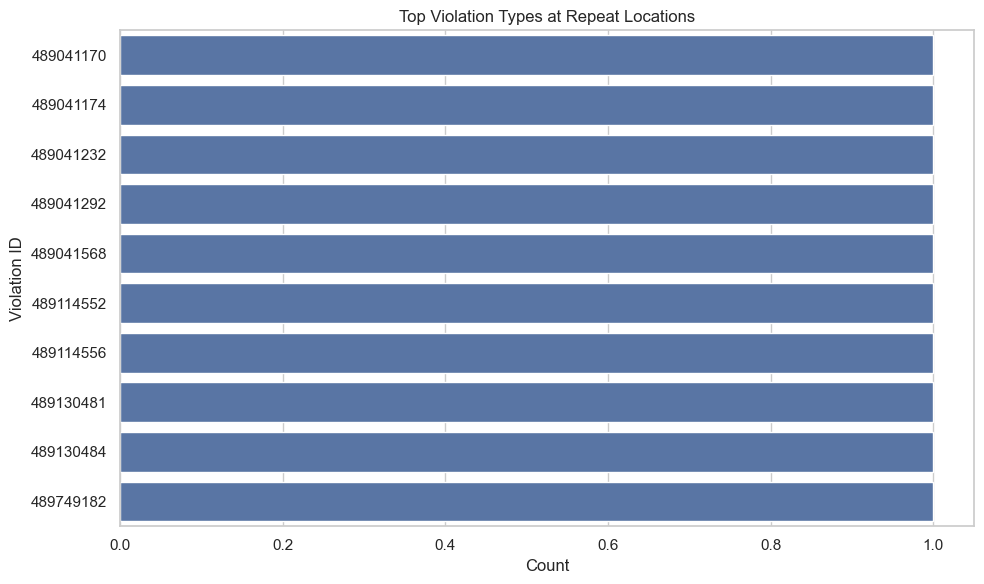


- Hypothesis: Certain stops/routes/intersections experience persistent violations due to [traffic patterns, enforcement, or design].
- Key findings: [Summarize top repeat locations, time/type patterns.]
- Actionable insights: [Suggest targeted enforcement or design changes.]



In [5]:
# Analyze temporal/categorical patterns and summarize findings
if repeat_keys:
    key = repeat_keys[0]
    # Try to find a date or type column
    date_col = next((col for col in violations_df.columns if 'date' in col.lower()), None)
    type_col = next((col for col in violations_df.columns if 'type' in col.lower() or 'violation' in col.lower()), None)
    if date_col:
        violations_df[date_col] = pd.to_datetime(violations_df[date_col], errors='coerce')
        violations_df['hour'] = violations_df[date_col].dt.hour
        plt.figure(figsize=(10,4))
        sns.histplot(violations_df['hour'].dropna(), bins=24, kde=False)
        plt.title('Violations by Hour of Day (All Locations)')
        plt.xlabel('Hour')
        plt.ylabel('Count')
        plt.show()
    if type_col:
        top_types = violations_df[type_col].value_counts().head(10)
        plt.figure(figsize=(10,6))
        sns.barplot(x=top_types.values, y=top_types.index, orient='h')
        plt.title('Top Violation Types at Repeat Locations')
        plt.xlabel('Count')
        plt.ylabel(type_col)
        plt.tight_layout()
        plt.show()
else:
    print('No suitable columns for temporal or categorical analysis.')

# Hypothesis and summary (edit after running analysis)
hypothesis = '''
- Hypothesis: Certain stops/routes/intersections experience persistent violations due to [traffic patterns, enforcement, or design].
- Key findings: [Summarize top repeat locations, time/type patterns.]
- Actionable insights: [Suggest targeted enforcement or design changes.]
'''
print(hypothesis)